In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [28]:
def load_images(left_image_path, right_image_path):
    left_image = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
    right_image = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)
    return left_image, right_image

In [29]:
def compute_ssd(window_left, window_right):
    ssd = np.sum((window_left - window_right)**2)
    return ssd

In [30]:
def stereo_matching(left_image, right_image, window_size, disparity_range):
    height, width = left_image.shape
    disparity_map = np.zeros_like(left_image, dtype=np.float32)
    half_window_size = window_size // 2
    
    for y in range(half_window_size, height - half_window_size):
        for x in range(half_window_size, width - half_window_size):
            window_left = left_image[y - half_window_size:y + half_window_size + 1,
                                     x - half_window_size:x + half_window_size + 1]

            min_ssd = float("inf")
            best_disparity = 0

            for d in range(disparity_range):
                if x - d < half_window_size:
                    continue
                
                window_right = right_image[y - half_window_size:y + half_window_size + 1,
                                           x - d - half_window_size:x - d + half_window_size + 1]

                ssd = compute_ssd(window_left, window_right)

                if ssd < min_ssd:
                    min_ssd = ssd
                    best_disparity = d

            disparity_map[y, x] = best_disparity

    return disparity_map


Text(0.5, 1.0, 'Estimated Disparity Map')

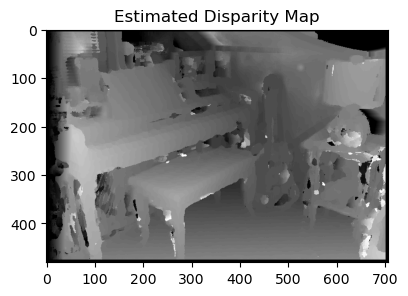

In [31]:
left_image, right_image = load_images("im0.png", "im1.png")
window_size = 11
disparity_range = 64
disparity_map = stereo_matching(left_image, right_image, window_size, disparity_range)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(disparity_map, cmap="gray")
plt.title("Estimated Disparity Map")


In [32]:
def load_ground_truth(ground_truth_path):
    ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    return ground_truth

In [33]:
def compute_difference_map(disparity_map, ground_truth):
    difference_map = np.abs(disparity_map - ground_truth)
    return difference_map

# Compare with groud_truth

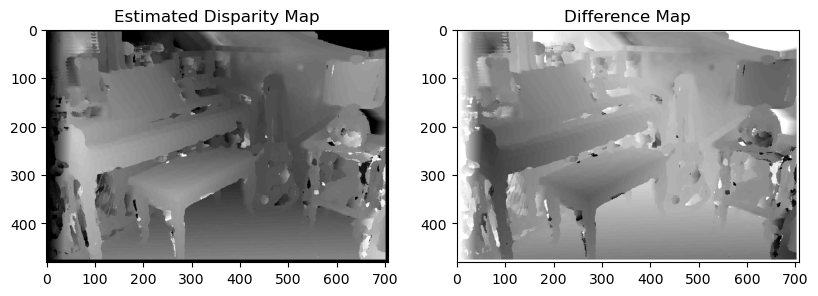

In [45]:
ground_truth = load_ground_truth("disp0GT.pfm")

window_size = 11
disparity_range = 64
difference_map = compute_difference_map(disparity_map, ground_truth)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(disparity_map, cmap="gray")
plt.title("Estimated Disparity Map")


plt.subplot(1, 3, 2)
plt.imshow(difference_map, cmap="gray")
plt.title("Difference Map")
plt.show()
